1. Preprocessing is not done
2. Recovery Rate = Number of Recovered cases/Number of Confirmed cases
3. Assumed that there are no data inconsistencies

In [2]:
# Importing required libraries
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import json
import operator
from urllib.request import urlopen
from datetime import datetime
from datetime import timedelta

Converting json into csv

In [3]:
# Opening JSON file and loading the data
# into the variable data

url = "https://data.covid19india.org/states_daily.json"
  
# store the response of URL
response = urlopen(url)
  
# storing the JSON response 
# from url in data
data = json.loads(response.read())

employee_data = data['states_daily']

# now we will open a file for writing
data_file = open('data_file.csv', 'w')

# create the csv writer object
csv_writer = csv.writer(data_file)

# Counter variable used for writing
# headers to the CSV file
count = 0

for emp in employee_data:
	if count == 0:

		# Writing headers of CSV file
		header = emp.keys()
		csv_writer.writerow(header)
		count += 1

	# Writing data of CSV file
	csv_writer.writerow(emp.values())

data_file.close()

# 1.1

In [ ]:
url = "https://data.covid19india.org/states_daily.json"
  
# store the response of URL
response = urlopen(url)
  
# storing the JSON response 
# from url in data
data_json = json.loads(response.read())

list_ = data_json['states_daily']

numConfirmed = 0
numDeceased = 0
numRecovered = 0

stateCode_state = {'nl':'Nagaland','mz':'Mizoram'}

delhi_confirmed = 0
delhi_recovered = 0
maharashtra = 0
westBengal = 0
tamilNadu = 0

upDate = datetime(2021,8,16)
downDate = datetime(2021,3,14)

for i in range(len(list_)):
  dict = list_[i]
  date_str = dict['dateymd']
  num = 0
  my_date = datetime.strptime(date_str, "%Y-%m-%d")
  # if my_date>downDate and my_date<upDate:
  for key in dict:
    if key!='date' and key!='dateymd' and key!='status':
      num = num+int(dict[key])
      if dict['status']=='Confirmed':
        numConfirmed = numConfirmed+num
      elif dict['status']=='Recovered':
        numRecovered = numRecovered+num
      else:
        numDeceased = numDeceased+num

print("Confirmed: ", numConfirmed)
print("Recovered: ", numRecovered)
print("Deceased: ", numDeceased)

# 1.2

In [ ]:
def Q1_2(state, state_name):
  df = pd.read_csv("data_file.csv", usecols = [state, 'status'])
  df_confirmed = df[df.status=='Confirmed']
  df_recovered = df[df.status=='Recovered']
  df_deceased = df[df.status=='Deceased']

  print(state_name)
  print("Confirmed = ", df_confirmed[state].sum())
  print("Recovered = ", df_recovered[state].sum())
  print("Deceased = ", df_deceased[state].sum())  
  print() 

Q1_2('dl', "Delhi")
Q1_2('mh', "Maharashtra")
Q1_2('wb', "West Bengal")
Q1_2('tn', "Tamil Nadu")

# 1.3

In [ ]:
df = pd.read_csv("data_file.csv")
all_states = df.columns.values.tolist()
dataframe_list = []

for state in all_states:
  if (state=='date' or state=='dateymd' or state=='status'):
    continue
  df = pd.read_csv("data_file.csv", usecols = [state,'status'])
  df_confirmed = df[df.status=='Confirmed'][state].sum()*1.0
  df_recovered = df[df.status=='Recovered'][state].sum()*1.0
  recovery_rate = df_recovered/df_confirmed
  append_list = [state, recovery_rate]
  dataframe_list.append(append_list)

df = pd.DataFrame(dataframe_list,columns = ['State','Recovery Rate'])
high = df.sort_values('Recovery Rate', ascending=False)
print("Highest recovery rate")
print(high.head(3))
low = df.sort_values('Recovery Rate')
print("Lowest recovery rate")
print(low.head(3))

# 1.4

In [ ]:
df = pd.read_csv("data_file.csv")
all_states = df.columns.values.tolist()
dataframe_list = []
for state in all_states:
  if(state=='date' or state=='dateymd' or state=='status'):
    continue
  df = pd.read_csv("data_file.csv", usecols = [state, 'status'])
  df_confirmed = df[df.status=='Confirmed']
  df_recovered = df[df.status=='Recovered']
  df_deceased = df[df.status=='Deceased']
  append_list = [state, df_confirmed[state].sum(), df_recovered[state].sum(), df_deceased[state].sum()]
  dataframe_list.append(append_list)

df_Q1_4 = pd.DataFrame(dataframe_list,columns = ['State','Confirmed','Recovered','Deceased'])
df_confirmed = df_Q1_4.sort_values('Confirmed', ascending = False)
print(df_confirmed.head(3)[['State','Confirmed']])
df_recovered = df_Q1_4.sort_values('Recovered', ascending = False)
print(df_recovered.head(3)[['State','Recovered']])
df_deceased = df_Q1_4.sort_values('Deceased', ascending = False)
print(df_deceased.head(3)[['State','Deceased']])

# 1.5

In [ ]:
df_confirmed = df_Q1_4.sort_values('Confirmed')
print(df_confirmed.head(3)[['State','Confirmed']])
df_recovered = df_Q1_4.sort_values('Recovered')
print(df_recovered.head(3)[['State','Recovered']])
df_deceased = df_Q1_4.sort_values('Deceased')
print(df_deceased.head(3)[['State','Deceased']])

# 1.6

In [ ]:
df = pd.read_csv("data_file.csv")
all_states = df.columns.values.tolist()

for state in all_states:
  dataframe_list = []
  if(state=='date' or state=='dateymd' or state=='status'):
    continue
  df = pd.read_csv("data_file.csv", usecols = [state, 'status','dateymd','date'])
  list__ = df[state].tolist()

  confirmed = 0
  recovered = 0
  deceased = 0
  con_case = 0
  rec_case = 0
  dec_case = 0

  date = "2020-03-14"
  date = datetime.strptime(date, "%Y-%m-%d")
  date = date+timedelta(days=1)

  for i in range(1, len(list__)):
    if i%3==0:
      if i-3>=0:
        curr = list__[i]
        prev = list__[i-3]
        confirmed = curr-prev
        con_case = curr
    elif i%3==1:
      if i-3>=0:
        curr = list__[i]
        prev = list__[i-3]
        recovered = curr-prev
        rec_case = curr
    else:
      if i-3>=0:
        curr = list__[i]
        prev = list__[i-3]
        deceased = curr-prev
        dec_case = curr
    if i%3==2:
      append_list = [state, confirmed, recovered, deceased, str(date),con_case,rec_case,dec_case]
      date = date+timedelta(days=1)
      dataframe_list.append(append_list)
  df = pd.DataFrame(dataframe_list,columns = ['State','Confirmed','Recovered','Deceased','Date','ConfirmedCases','RecoveredCases','DeceasedCases'])
  print(state)
  df_confirmed = df.sort_values('Confirmed', ascending = False)
  print("Confirmed", df_confirmed.iloc[0]['Date'], df_confirmed.iloc[0]['ConfirmedCases'])
  df_recovered = df.sort_values('Recovered', ascending = False)
  print("Recovered", df_confirmed.iloc[0]['Date'], df_confirmed.iloc[0]['RecoveredCases'])
  df_deceased = df.sort_values('Deceased', ascending = False)
  print("Deceased", df_confirmed.iloc[0]['Date'], df_confirmed.iloc[0]['DeceasedCases'])
  print()

# 1.7

In [ ]:
df = pd.read_csv("data_file.csv")
all_states = df.columns.values.tolist()
for state in all_states:
  if(state=='date' or state=='dateymd' or state=='status'):
    continue
  df = pd.read_csv("data_file.csv", usecols = [state, 'status','date'])
  df_confirmed = df[(df.status=='Confirmed') & (df.date!='16-Aug-21')]
  df_confirmed = df_confirmed[state].sum()
  # print(df_confirmed)
  df_recovered = df[(df.status=='Recovered') & (df.date!='16-Aug-21')]
  df_recovered = df_recovered[state].sum()
  df_deceased = df[(df.status=='Deceased') & (df.date!='16-Aug-21')]
  df_deceased = df_deceased[state].sum()
  active = df_confirmed-(df_recovered + df_deceased)
  # active = active-df_deceased
  print(state, active)

# 2.1

In [ ]:
df = pd.read_csv("data_file.csv")
dataframe_list = []
dataframe_list_dl = []
dataframe_list_gj = []
dataframe_list_tn = []

keys = list(df.keys())
confirmed = 0
confirmed_dl = 0
confirmed_gj = 0
confirmed_tn = 0

recovered = 0
recovered_dl = 0
recovered_gj = 0
recovered_tn = 0

deceased = 0
deceased_dl = 0
deceased_gj = 0
deceased_tn = 0

for index, row in df.iterrows():
  if row['status']=='Confirmed':
    for key in keys:
      if key=='status' or key=='date' or key=='dateymd':
        continue
      confirmed = confirmed+row[key]
    confirmed_dl = confirmed_dl+row['dl']
    confirmed_gj = confirmed_gj+row['gj']
    confirmed_tn = confirmed_tn+row['tn']
  elif row['status']=='Recovered':
    for key in keys:
      if key=='status' or key=='date' or key=='dateymd':
        continue
      recovered = recovered+row[key]
    recovered_dl = recovered_dl+row['dl']
    recovered_gj = recovered_gj+row['gj']
    recovered_tn = recovered_tn+row['tn']
  else:
    for key in keys:
      if key=='status' or key=='date' or key=='dateymd':
        continue
      deceased = deceased+row[key]
    deceased_dl = deceased_dl+row['dl']
    deceased_gj = deceased_gj+row['gj']
    deceased_tn = deceased_tn+row['tn']
    append_list = [row['dateymd'],confirmed,recovered,deceased]
    dataframe_list.append(append_list)
    append_list_dl = [row['dateymd'],confirmed_dl,recovered_dl,deceased_dl]
    dataframe_list_dl.append(append_list_dl)
    append_list_tn = [row['dateymd'],confirmed_tn,recovered_tn,deceased_tn]
    dataframe_list_tn.append(append_list_tn)
    append_list_gj = [row['dateymd'],confirmed_gj,recovered_gj,deceased_gj]
    dataframe_list_gj.append(append_list_gj)
    confirmed_dl = 0
    recovered_dl = 0
    deceased_dl = 0
    confirmed_tn = 0
    recovered_tn = 0
    deceased_tn = 0
    confirmed_gj = 0
    recovered_gj = 0
    deceased_gj = 0
    confirmed = 0
    recovered = 0
    deceased = 0

df = pd.DataFrame(dataframe_list,columns = ['Date','Confirmed','Recovered','Deceased'])
# print(df)
for_2_3 = df
df = pd.DataFrame({
    'Confirmed': df['Confirmed'].tolist(),
    'Recovered': df['Recovered'].tolist(),
    'Deceased': df['Deceased'].tolist(),
}, index=pd.date_range(start='2020/03/14', end='2021/08/16',freq='D'))
print("Not cumulative")
ax = df.plot.area(stacked=False)
df = df.cumsum()
print("Cumulative")
ax = df.plot.area(stacked=False)

# 2.2

In [ ]:
df = pd.DataFrame(dataframe_list_dl,columns = ['Date','Confirmed','Recovered','Deceased'])
df = pd.DataFrame({
    'Confirmed': df['Confirmed'].tolist(),
    'Recovered': df['Recovered'].tolist(),
    'Deceased': df['Deceased'].tolist(),
}, index=pd.date_range(start='2020/03/14', end='2021/08/16',freq='D'))
print("Not cumulative")
ax = df.plot.area(stacked=False)
df = df.cumsum()
print("Cumulative")
ax = df.plot.area(stacked=False)

# 2.3

In [ ]:
df = for_2_3
def findActive(df):
  active_list = []
  for index, row in df.iterrows():
    active = row['Confirmed']-row['Recovered']-row['Deceased']
    active_list.append(active)
  df['Active'] = active_list

findActive(df)
df = pd.DataFrame({
      'Active': df['Active'].tolist(),
  }, index=pd.date_range(start='2020/03/14', end='2021/08/16',freq='D'))
print("Not cumulative")
ax = df.plot.area(stacked=False)
df = df.cumsum()
print("Cumulative")
ax = df.plot.area(stacked=False)

# 2.4

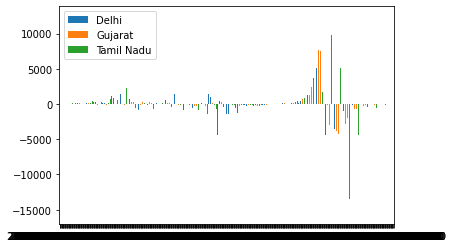

In [38]:
df_dl = pd.DataFrame(dataframe_list_dl,columns = ['Date','Confirmed','Recovered','Deceased'])
df_tn = pd.DataFrame(dataframe_list_tn,columns = ['Date','Confirmed','Recovered','Deceased'])
df_gj = pd.DataFrame(dataframe_list_gj,columns = ['Date','Confirmed','Recovered','Deceased'])
findActive(df_dl)
findActive(df_tn)
findActive(df_gj)
active_dl = df_dl['Active'].tolist()
active_gj = df_gj['Active'].tolist()
active_tn = df_tn['Active'].tolist()
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant',
#          'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'Delhi': active_dl,
                   'Gujarat': active_gj,
                   'Tamil Nadu': active_tn}, index=pd.date_range(start='2020/03/14', end='2021/08/16',freq='D'))
ax = df.plot.bar(rot=0)